# Practical Machine Learning for Physicists
## Coursework C -- Part 1
 

### Task 1:
Design, implement and test a neural network utilising a single convolutional layer (use as many other non convolutional layers as you need) to classify the MNIST handwritten digits. What is the maximum test $accuracry$ you can achieve using a single convolutional layer?

### Task 2:
Design, implement and test a neural network utitlising multiple convolutional layers (again use as many other non convolutinal laters as you need) to classify the MNIST handwritten digits. What is the maximum test accuracry you can achieve using as many convolutional layers as you like?

#### Practicalities
You should use this notebook for your work and upload it to Moodle. You are expected to use TensorFlow and Keras to complete these takss. The notebook should be self-contained and able to be executed if necessary. Marks will be awarded for (roughly equally weighted):
- Overall notebook clarity (both in terms of good coding practice and coherent discussion)
- Network performance (how well does your classifier do?)
- Network efficiency (how does your network compare to the optimum networks for this task?)
- Network training (do you do a good job of traning your network?)


### 1. Neural network with 1 convolutionial layer

### 2. Neural network with 2 convolutional layers

### 3. Conclusion

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
import keras.layers
import keras.datasets.mnist

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255
test_images = test_images / 255

### 1. Neural network with 1 convolutionial layer

In [3]:
model = keras.Sequential()

# one convolutional layer, with 48 kernels
model.add(keras.layers.Conv2D(10, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))

model.add(keras.layers.MaxPooling2D(2, 2))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(20, activation='relu'))

model.add(keras.layers.Dense(20, activation='relu'))

model.add(keras.layers.Dense(10))
    
model.summary()
    
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                 metrics = ['accuracy'])
    
history = model.fit(train_images, train_labels, batch_size = 300, epochs = 15)
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 10)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 20)                33820     
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                        

<IPython.core.display.Javascript object>


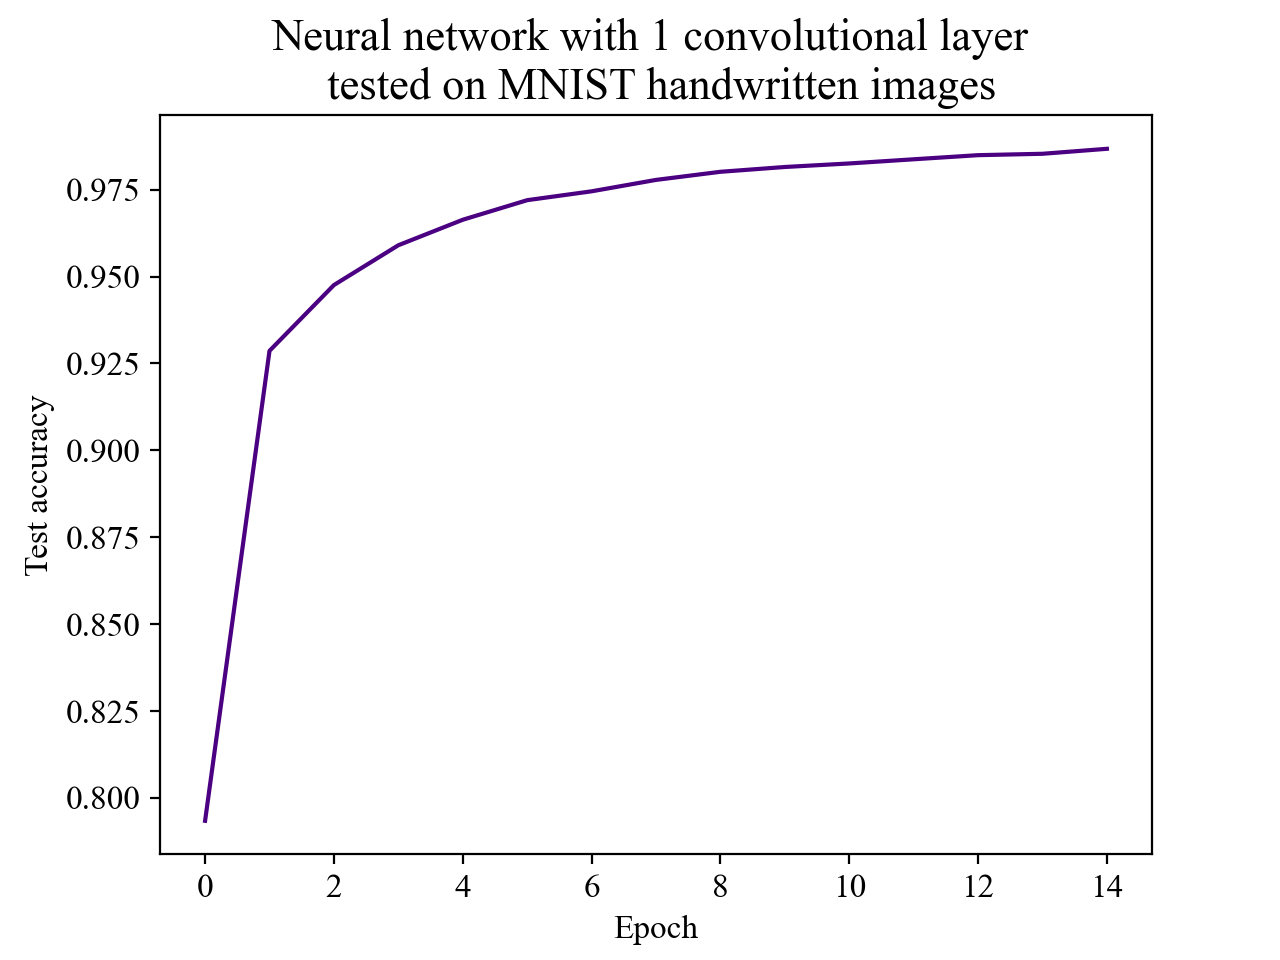

The final accuracy is 98.67666959762573 %


In [4]:
plt.figure(1)

plt.plot(history.history['accuracy'], color='indigo')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.title('Neural network with 1 convolutional layer \n tested on MNIST handwritten images')

print('The final accuracy is', history.history['accuracy'][-1] *100 , '%')

### 2. Neural network with 2 convolutional layers

In [5]:
model2 = keras.Sequential()

# first convolutional layer, with 16 kernels
model2.add(keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (28, 28, 1)))

model2.add(keras.layers.MaxPooling2D((2, 2)))

# second convolutional layer, with 16 kernels
model2.add(keras.layers.Conv2D(16, (3, 3), activation = 'relu'))

model2.add(keras.layers.MaxPooling2D((2, 2)))

model2.add(keras.layers.Flatten())

model2.add(keras.layers.Dense(64, activation = 'relu'))

model2.add(keras.layers.Dense(15))

model2.summary()

model2.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
                 metrics = ['accuracy'])

history2 = model2.fit(train_images, train_labels, batch_size = 300, epochs = 15)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 64)               

<IPython.core.display.Javascript object>


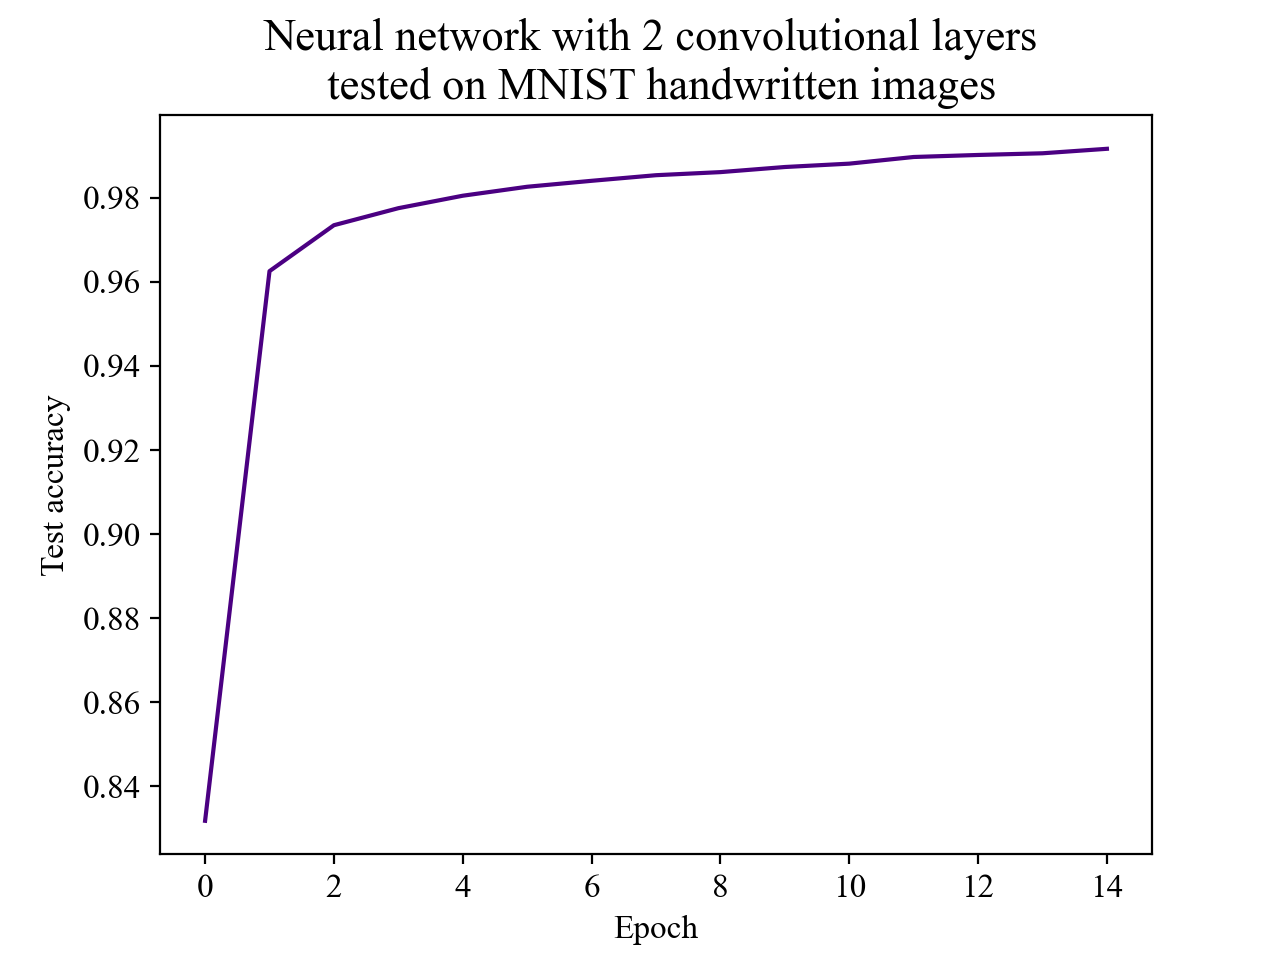

The final accuracy is 99.1683304309845 %


In [6]:
plt.figure(2)

plt.plot(history2.history['accuracy'], color='indigo')
plt.xlabel('Epoch')
plt.ylabel('Test accuracy')
plt.title('Neural network with 2 convolutional layers \n tested on MNIST handwritten images')

print('The final accuracy is', history2.history['accuracy'][-1] * 100, '%')

### 3. Conclusion

In the network with one convolutional layer with 10 kernels, a high accuracy was achieved with a balance of performance and compilation time. Using more kernels results in higher accuracy but takes longer, but $98.9 \%$ is very good.

In the second network with two convolutional layers both having 16 kernels, the accuracy reaches $99.2 \%$. Adding more layers would be redundant at this point as the network is already very accurate, and the compilation time is not too long.

The networks have both achieved accuracies above 98.9%, they are extremely accurate at classifying the MNIST handwritten images correctly.